<br>
  <a href="https://colab.research.google.com/github/markl-a/llm-course-tw/blob/main/1.LLM%20基礎/數學基礎/Course%20File/Linear%20Regression%20Demo.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<br>

# Linear Regression demo

Code including two way to do linear regression:

- Gradient Descent
- Normal Equation

## Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
def cost_function(X, y, theta):
    h = np.dot(X, theta)
    difference = np.square(h - y)
    cost = np.sum(difference) / (2 * len(y))
    return cost

def gradient_descent(X, y, theta, alpha):
    h = np.dot(X, theta)
    difference = h - y
    theta = theta - (alpha / len(y)) * (np.dot(X.T, difference));
    return theta

In [3]:
num_iters = 1000
alpha = 0.01  # Learning rate

        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


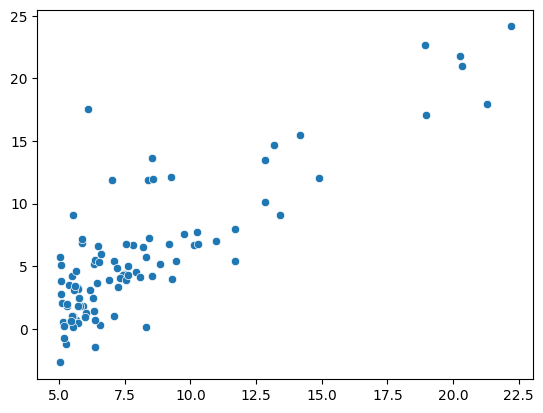

In [13]:
url = 'https://raw.githubusercontent.com/markl-a/llm-course-tw/main/1.LLM%20%E5%9F%BA%E7%A4%8E/%E6%95%B8%E5%AD%B8%E5%9F%BA%E7%A4%8E/data_set/ex1data1.txt'
data = pd.read_csv(url, header=None)

#print(data.head()) 
#X = np.array(data[0])
#y = np.transpose([np.array(data[1])])

#sns.scatterplot(X.T, y.T[0])  # Show data distribution

#X = np.column_stack((np.ones(len(X)), X))



# 将DataFrame列转换为正确的numpy数组
X = data[0].values
y = data[1].values

# 使用Seaborn正确地绘制散点图
sns.scatterplot(x=X, y=y)  # 现在直接传递x和y作为参数

# 如果需要添加一列1到X（例如，用于线性回归的特征矩阵）
X = np.column_stack((np.ones(len(X)), X))

In [ ]:
# Randomly select theta for hypothesis
theta = np.array([[random.uniform(y.min(), y.max()/2)], [random.uniform(-1, 1)]])
# theta = np.array([[0],[0]])

In [ ]:
print("Inital θ_0: {:f} θ_1: {:f}".format(theta[0][0], theta[1][0]))
cost_array = []
for _ in range(num_iters):
    theta = gradient_descent(X, y, theta, alpha)
    cost_array.append(cost_function(X, y, theta))
print("After {:d} iterations, the cost is {:f} and the hypothesis is h(θ)={:.4f}+{:.4f}X".format(num_iters, cost_function(X, y, theta), theta[0][0], theta[1][0]))

Inital θ_0: 9.783382 θ_1: -0.858830
After 1000 iterations, the cost is 4.943083 and the hypothesis is h(θ)=-1.6331+0.9657X


Text(0,0.5,'Cost')

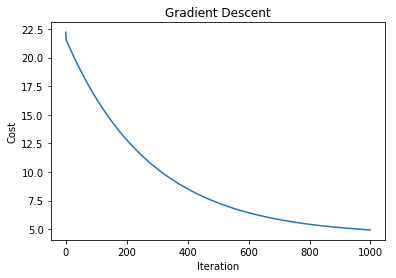

In [ ]:
# Plot cost change
g = sns.lineplot(np.arange(num_iters), cost_array)
plt.title('Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')

## Normal Equation

> Please make sure that your matrix X is a non-singular matrix before you run this code

In [ ]:
data = pd.read_csv('ex1data1.txt', header=None)

X = np.array(data[0])

ne_X = np.column_stack((np.ones(len(X)), X))
ne_y = np.transpose([np.array(data[1])])

In [ ]:
theta = np.dot(np.dot(np.linalg.inv(np.dot(ne_X.T, ne_X)), ne_X.T), y)

In [ ]:
print("The cost is {:f} and the hypothesis is h(θ)={:.4f}+{:.4f}X".format(cost_function(ne_X, ne_y, theta), theta[0][0], theta[1][0]))

The cost is 4.476971 and the hypothesis is h(θ)=-3.8958+1.1930X


## Credit

Data `ex1data1.txt` is from Andrew Ng's Machine Learning Course